In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

data = pd.read_csv("forest_fire_dataset.csv")

data['Classes'] = data['Classes'].str.strip()
data['Classes'] = data['Classes'].map({'fire': 1, 'not fire': 0})

In [25]:
data = data.drop(columns=['day', 'month', 'year'])

x = data.drop(columns='Classes')
y = data['Classes']

In [26]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

In [27]:
grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid={
        'max_depth': [3, 5, 10, None],
        'criterion': ['gini']
    },
    cv=5
)


grid_search.fit(x_train, y_train)

model = grid_search.best_estimator_
model.fit(x_train, y_train)


DecisionTreeClassifier(max_depth=3, random_state=42)

In [28]:
y_pred = model.predict(x_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Evaluation Metrics")
print(f"Accuracy:  {acc:.2f}")
print(f"Precision: {prec:.2f}")
print(f"Recall:    {rec:.2f}")
print(f"F1 Score:  {f1:.2f}")

Evaluation Metrics
Accuracy:  0.98
Precision: 0.96
Recall:    1.00
F1 Score:  0.98


In [30]:
feature_importances = model.feature_importances_

features_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importances})
features_df


,Feature,Importance
0,Temperature,0.000000
1,RH,0.000000
2,Ws,0.000000
3,Rain,0.000000
4,FFMC,0.958948
5,DMC,0.014180
6,DC,0.000000
7,ISI,0.026872
8,BUI,0.000000
9,FWI,0.000000


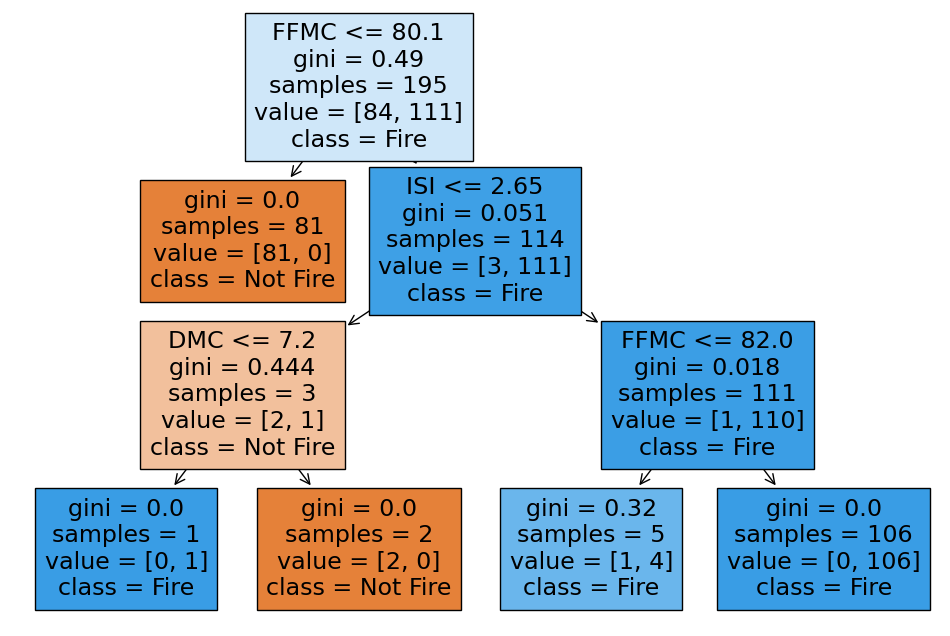

In [33]:
plt.figure(figsize=(12,8))
plot_tree(model, filled=True, feature_names=feature_names, class_names=["Not Fire", "Fire"])
plt.show()